<a href="https://colab.research.google.com/github/VidhikaB-Rayate/Projects/blob/main/Food_Price_Predictions/FoodPricePredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Loading**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wfp_food_prices_ind.csv to wfp_food_prices_ind.csv


In [ ]:
import pandas as pd
df = pd.read_csv("wfp_food_prices_ind.csv")

<ipython-input-1-d2f559417207>:2: DtypeWarning: Columns (4,5,6,9,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("wfp_food_prices_ind.csv")


In [ ]:
df.head(4)

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#loc+market+code,#geo+lat,#geo+lon,#item+type,#item+name,#item+code,#item+unit,#item+price+flag,#item+price+type,#currency+code,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,cereals and tubers,Rice,52,KG,actual,Retail,INR,8,0.26
2,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,oil and fats,Oil (mustard),228,KG,actual,Retail,INR,31,0.99
3,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,923,23.03,72.62,cereals and tubers,Wheat,84,KG,actual,Retail,INR,6.2,0.2


### **Data Exploaration**

In [ ]:
df.shape

(149816, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149816 entries, 0 to 149815
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          149816 non-null  object
 1   admin1        149265 non-null  object
 2   admin2        149265 non-null  object
 3   market        149816 non-null  object
 4   market_id     149816 non-null  object
 5   latitude      149265 non-null  object
 6   longitude     149265 non-null  object
 7   category      149816 non-null  object
 8   commodity     149816 non-null  object
 9   commodity_id  149816 non-null  object
 10  unit          149816 non-null  object
 11  priceflag     149816 non-null  object
 12  pricetype     149816 non-null  object
 13  currency      149816 non-null  object
 14  price         149816 non-null  object
 15  usdprice      149816 non-null  object
dtypes: object(16)
memory usage: 18.3+ MB


**Comment:** All columns have the data type object, even for columns like latitude, longitude, price, and usdprice which ideally should be numeric.
This indicates the presence of mixed data types or non-numeric values (like missing entries, text strings, or special characters) in those columns.

We will need to handle this during the Data Cleaning phase by converting these columns to appropriate numeric types and managing any invalid entries."

In [ ]:
df['admin1'].unique()

array(['#adm1+name', 'Delhi', 'Gujarat', 'Himachal Pradesh', 'Karnataka',
       'Madhya Pradesh', 'Maharashtra', 'Orissa', 'Telangana', 'Tripura',
       'West Bengal', 'Meghalaya', 'Rajasthan', 'Tamil Nadu', 'Kerala',
       'Uttar Pradesh', 'Mizoram', 'Assam', 'Bihar', 'Chandigarh',
       'Nagaland', 'Punjab', 'Uttarakhand', 'Jharkhand', 'Andhra Pradesh',
       'Haryana', 'Andaman and Nicobar', 'Puducherry', 'Goa', nan,
       'Chhattisgarh', 'Manipur', 'Sikkim'], dtype=object)

In [ ]:
df['admin2'].unique()

array(['#adm2+name', 'Delhi', 'Ahmadabad', 'Shimla', 'Bangalore Urban',
       'Bhopal', 'Mumbai city', 'Khordha', 'Hyderabad', 'West Tripura',
       'Kolkata', 'East Khasi Hills', 'Bikaner', 'Chennai',
       'Thiruvananthapuram', 'Lucknow', 'Aizawl', 'Kamrup', 'Patna',
       'Chandigarh', 'Amravati', 'Kohima', 'Amritsar', 'Ludhiana',
       'Dehra Dun', 'Ranchi', 'Krishna', 'Dindigul', 'Kanpur', 'Rajkot',
       'Banka', 'Hisar', 'Karnal', 'Mandi', 'Dharwad', 'Bid', 'Cuttack',
       'Sambalpur', 'Agra', 'Varanasi', 'Darjiling', 'Indore', 'Bathinda',
       'Jodhpur', 'Dimapur', 'Ernakulam', 'Tiruchchirappalli', 'Kota',
       'Andaman Islands', 'Puducherry', 'North Goa', 'Gurgaon',
       'Panchkula', 'Kozhikode', 'Gwalior', 'Jabalpur', 'Sundargarh', nan,
       'Chittoor', 'Kurnool', 'Vishakhapatnam', 'Darbhanga', 'Gaya',
       'Muzaffarpur', 'Purnia', 'Bastar', 'Bilaspur', 'Durg', 'Surguja',
       'Kachchh', 'Surat', 'Kangra', 'Solan', 'Dakshin Kannad', 'Mysore',
       'Palak

In [ ]:
df['market'].unique()

array(['#loc+market+name', 'Delhi', 'Ahmedabad', 'Shimla', 'Bengaluru',
       'Bhopal', 'Mumbai', 'Bhubaneshwar', 'Hyderabad', 'Agartala',
       'Kolkata', 'Shillong', 'Jaipur', 'Chennai', 'Tiruvanantapuram',
       'Lucknow', 'Aizawl', 'Guwahati', 'Patna', 'Chandigarh', 'Raipur',
       'Kohima', 'Amritsar', 'Ludhiana', 'Dehradun', 'Ranchi',
       'Vijaywada', 'Dindigul', 'Kanpur', 'Rajkot', 'Bhagalpur', 'Hisar',
       'Karnal', 'Mandi', 'Dharwad', 'Nagpur', 'Cuttack', 'Sambalpur',
       'Agra', 'Varanasi', 'Siliguri', 'Indore', 'Bathinda', 'Jodhpur',
       'Dimapur', 'Ernakulam', 'Thiruchirapalli', 'Kota', 'Port Blair',
       'Puducherry', 'Panaji', 'Gurgaon', 'Panchkula', 'Kozhikode',
       'T.Puram', 'Gwalior', 'Jabalpur', 'Rourkela', 'National Average',
       'Mayabunder', 'Tirupathi', 'Kurnool', 'Visakhapatnam', 'Darbhanga',
       'Bihar_Gaya', 'Muzzafarpur', 'Purnia', 'Jagdalpur', 'Bilaspur',
       'Durg', 'Ambikapur', 'Bhuj', 'Surat', 'Dharamshala', 'Solan',
       '

In [ ]:
df_North = df[df['admin2']=='Bhopal']
df_North.head(3)

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
13,1994-01-15,Madhya Pradesh,Bhopal,Bhopal,928,23.27,77.4,cereals and tubers,Rice,52,KG,actual,Retail,INR,6.25,0.2
14,1994-01-15,Madhya Pradesh,Bhopal,Bhopal,928,23.27,77.4,cereals and tubers,Wheat,84,KG,actual,Retail,INR,4.5,0.14
15,1994-01-15,Madhya Pradesh,Bhopal,Bhopal,928,23.27,77.4,miscellaneous food,Sugar,97,KG,actual,Retail,INR,13.25,0.42


**Comments:** Column admin1 represents States and Union Territories, such as various states across the country, with Andaman and Nicobar Islands being an example of a Union Territory.

Column admin2 corresponds to cities within these regions.

Column market is almost the same as admin2 so we will drop that and instead we will create new column as Zones as markets do include some zones

### **Data Cleaning**

In [ ]:
df2 = df.drop(0)
df2 = df2.reset_index(drop=True)
df2.head(2)

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,cereals and tubers,Rice,52,KG,actual,Retail,INR,8,0.26
1,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,oil and fats,Oil (mustard),228,KG,actual,Retail,INR,31,0.99


In [ ]:
df2.describe()

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
count,149815,149264,149264,149815,149815,149264,149264.00,149815,149815,149815,149815,149815,149815,149815,149815.0,149815.00
unique,374,31,163,170,227,217,210.00,6,23,46,3,1,2,1,25209.0,2534.00
top,2022-04-15,Uttar Pradesh,Mumbai city,Mumbai,955,18.98,75.83,oil and fats,Rice,52,KG,actual,Retail,INR,40.0,0.27
freq,2318,11712,3287,3287,1786,1786,2524.00,36873,11221,6319,140471,149815,148215,149815,1664.0,1641.00


In [ ]:
df2.isnull().sum()

,0
date,0
admin1,551
admin2,551
market,0
market_id,0
latitude,551
longitude,551
category,0
commodity,0
commodity_id,0


In [ ]:
df2[df2[['admin1']].isnull().any(axis=1)].head()

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
30975,2015-07-15,NaN,NaN,National Average,1887,NaN,NaN,cereals and tubers,Potatoes,83,KG,actual,Retail,INR,15.78,0.25
30976,2015-07-15,NaN,NaN,National Average,1887,NaN,NaN,cereals and tubers,Rice,52,KG,actual,Retail,INR,27.52,0.43
30977,2015-07-15,NaN,NaN,National Average,1887,NaN,NaN,cereals and tubers,Wheat,84,KG,actual,Retail,INR,22.64,0.36
30978,2015-07-15,NaN,NaN,National Average,1887,NaN,NaN,cereals and tubers,Wheat flour,58,KG,actual,Retail,INR,24.67,0.39
30979,2015-07-15,NaN,NaN,National Average,1887,NaN,NaN,milk and dairy,Milk (pasteurized),463,L,actual,Retail,INR,39.45,0.62


In [ ]:
df2[df2[['admin1']].isnull().any(axis=1)].tail()

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
64104,2019-06-15,NaN,NaN,National Average,1887,NaN,NaN,oil and fats,Oil (palm),62,KG,actual,Retail,INR,74.72,1.07
64105,2019-06-15,NaN,NaN,National Average,1887,NaN,NaN,oil and fats,Oil (sunflower),184,KG,actual,Retail,INR,99.32,1.42
64106,2019-06-15,NaN,NaN,National Average,1887,NaN,NaN,pulses and nuts,Lentils,108,KG,actual,Retail,INR,66.16,0.95
64107,2019-06-15,NaN,NaN,National Average,1887,NaN,NaN,pulses and nuts,Lentils (moong),325,KG,actual,Retail,INR,81.92,1.17
64108,2019-06-15,NaN,NaN,National Average,1887,NaN,NaN,pulses and nuts,Lentils (urad),332,KG,actual,Retail,INR,75.2,1.08


In [ ]:
null_check = df2[df2['admin1'].isnull() & df2['admin2'].isnull() & df2['latitude'].isnull() & df2['longitude'].isnull()]
len(null_check)

551

In [ ]:
check = df2[df2['market']=='National Average']
len(check)

551

**Comments:** Found 551 rows for 'National Average' market with null values in admin1, admin2, latitude, and longitude. These represent country-level price records without regional details, so the nulls are acceptable.


In [ ]:
df2.loc[df2['market'] == 'National Average', ['admin1', 'admin2']] = df2.loc[df2['market'] == 'National Average', ['admin1', 'admin2']].fillna('National')
check.head(3)

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
30975,2015-07-15,National,National,National Average,1887,NaN,NaN,cereals and tubers,Potatoes,83,KG,actual,Retail,INR,15.78,0.25
30976,2015-07-15,National,National,National Average,1887,NaN,NaN,cereals and tubers,Rice,52,KG,actual,Retail,INR,27.52,0.43
30977,2015-07-15,National,National,National Average,1887,NaN,NaN,cereals and tubers,Wheat,84,KG,actual,Retail,INR,22.64,0.36


**Comments:**
Replaced null values in admin1 and admin2 columns with 'National' for 'National Average' market rows to maintain consistency.

Latitude and longitude fields remain NaN as these records represent aggregated country-level data without specific location.

In [ ]:
df3 = df2.drop(columns=['market'])

In [ ]:
df3.head(2)

,date,admin1,admin2,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,1994-01-15,Delhi,Delhi,934,28.67,77.22,cereals and tubers,Rice,52,KG,actual,Retail,INR,8,0.26
1,1994-01-15,Delhi,Delhi,934,28.67,77.22,oil and fats,Oil (mustard),228,KG,actual,Retail,INR,31,0.99


In [ ]:
def assign_zone(state):
    if state in ['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Uttarakhand', 'Haryana', 'Delhi', 'Uttar Pradesh', 'Chandigarh']:
        return 'North'
    elif state in ['West Bengal', 'Odisha', 'Bihar', 'Jharkhand', 'Sikkim', 'Assam', 'Arunachal Pradesh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura']:
        return 'East'
    elif state in ['Rajasthan', 'Gujarat', 'Madhya Pradesh', 'Chhattisgarh', 'Maharashtra', 'Goa']:
        return 'West'
    elif state in ['Andhra Pradesh', 'Telangana', 'Karnataka', 'Tamil Nadu', 'Kerala', 'Puducherry', 'Andaman and Nicobar Islands', 'Lakshadweep']:
        return 'South'
    elif state == 'National':
        return 'National'
    else:
        return 'Unknown'

# Apply the zone assignment
df3['zone'] = df3['admin1'].apply(assign_zone)

**Comments:**Dropped redundant 'market' column as it almost mirrored 'admin2'.

Created new 'zone' column by mapping 'admin1' (states/UTs) to their respective regions: North, South, East, West. 'National Average' records assigned to 'National' zone for consistency.

In [ ]:
df3.rename(columns={'admin1':'state_ut','admin2':'city'},inplace=True)

In [ ]:
df3.tail()

,date,state_ut,city,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,zone
149810,2025-02-15,Rajasthan,Jaipur,9638,26.94,75.8,oil and fats,Oil (palm),62,KG,actual,Retail,INR,126.92,1.46,West
149811,2025-02-15,Rajasthan,Jaipur,9638,26.94,75.8,oil and fats,Oil (soybean),306,KG,actual,Retail,INR,145.68,1.68,West
149812,2025-02-15,Rajasthan,Jaipur,9638,26.94,75.8,pulses and nuts,Lentils,108,KG,actual,Retail,INR,142.05,1.64,West
149813,2025-02-15,Rajasthan,Jaipur,9638,26.94,75.8,pulses and nuts,Lentils (masur),61,KG,actual,Retail,INR,88.41,1.02,West
149814,2025-02-15,Rajasthan,Jaipur,9638,26.94,75.8,vegetables and fruits,Tomatoes,114,KG,actual,Retail,INR,22.23,0.26,West


**Comment:**
Renamed 'admin1' to 'state_ut' and 'admin2' to 'city' for better clarity and readability.

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149815 entries, 0 to 149814
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          149815 non-null  datetime64[ns]
 1   state_ut      149815 non-null  object        
 2   city          149815 non-null  object        
 3   market_id     149815 non-null  float64       
 4   latitude      149264 non-null  float64       
 5   longitude     149264 non-null  float64       
 6   category      149815 non-null  object        
 7   commodity     149815 non-null  object        
 8   commodity_id  149815 non-null  float64       
 9   unit          149815 non-null  object        
 10  priceflag     149815 non-null  object        
 11  pricetype     149815 non-null  object        
 12  currency      149815 non-null  object        
 13  price         149815 non-null  float64       
 14  usdprice      149815 non-null  float64       
 15  zone          149

In [ ]:
cols_to_convert = ['price', 'usdprice','latitude', 'longitude','market_id','commodity_id']
df3[cols_to_convert] = df3[cols_to_convert].astype(float)
df3['date'] = pd.to_datetime(df3['date'])
df3['year'] = df3['date'].dt.year

**Comments:**Converted data columns to numeric type where necessary, transformed the date column into datetime format, and extracted the year into separate columns for better time-based analysis.

In [ ]:
df3.head(5)

,date,state_ut,city,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,zone,year
0,1994-01-15,Delhi,Delhi,934.0,28.67,77.22,cereals and tubers,Rice,52.0,KG,actual,Retail,INR,8.0,0.26,North,1994
1,1994-01-15,Delhi,Delhi,934.0,28.67,77.22,oil and fats,Oil (mustard),228.0,KG,actual,Retail,INR,31.0,0.99,North,1994
2,1994-01-15,Gujarat,Ahmadabad,923.0,23.03,72.62,cereals and tubers,Wheat,84.0,KG,actual,Retail,INR,6.2,0.20,West,1994
3,1994-01-15,Gujarat,Ahmadabad,923.0,23.03,72.62,miscellaneous food,Sugar,97.0,KG,actual,Retail,INR,13.5,0.43,West,1994
4,1994-01-15,Gujarat,Ahmadabad,923.0,23.03,72.62,oil and fats,Oil (mustard),228.0,KG,actual,Retail,INR,30.0,0.96,West,1994


In [ ]:
df3['unit'].unique()

array(['KG', '100 KG', 'L'], dtype=object)

In [ ]:
unit = df3[df3['unit']=='100 KG']
unit

,date,state_ut,city,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,zone
1849,2000-01-15,Delhi,Delhi,934.0,28.67,77.22,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,1075.00,24.73,North
1850,2000-01-15,Delhi,Delhi,934.0,28.67,77.22,cereals and tubers,Wheat,84.0,100 KG,actual,Wholesale,INR,700.00,16.10,North
1865,2000-01-15,Maharashtra,Mumbai city,955.0,18.98,72.83,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,1136.50,26.14,West
1877,2000-01-15,Tamil Nadu,Chennai,931.0,13.08,80.28,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,1067.50,24.56,South
1897,2000-02-15,Bihar,Patna,957.0,25.60,85.12,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,810.00,18.58,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76233,2020-10-15,Delhi,Delhi,934.0,28.67,77.22,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,2862.07,38.98,North
76238,2020-10-15,Delhi,Delhi,934.0,28.67,77.22,miscellaneous food,Sugar,97.0,100 KG,actual,Wholesale,INR,3491.72,47.56,North
76708,2020-10-15,Maharashtra,Mumbai city,955.0,18.98,72.83,cereals and tubers,Wheat,84.0,100 KG,actual,Wholesale,INR,2775.00,37.80,West
76714,2020-10-15,Maharashtra,Mumbai city,955.0,18.98,72.83,miscellaneous food,Sugar,97.0,100 KG,actual,Wholesale,INR,3311.10,45.10,West


In [ ]:
wholesale = df3[df3['pricetype']=='Wholesale']
wholesale

,date,state_ut,city,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,zone
1849,2000-01-15,Delhi,Delhi,934.0,28.67,77.22,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,1075.00,24.73,North
1850,2000-01-15,Delhi,Delhi,934.0,28.67,77.22,cereals and tubers,Wheat,84.0,100 KG,actual,Wholesale,INR,700.00,16.10,North
1865,2000-01-15,Maharashtra,Mumbai city,955.0,18.98,72.83,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,1136.50,26.14,West
1877,2000-01-15,Tamil Nadu,Chennai,931.0,13.08,80.28,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,1067.50,24.56,South
1897,2000-02-15,Bihar,Patna,957.0,25.60,85.12,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,810.00,18.58,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76233,2020-10-15,Delhi,Delhi,934.0,28.67,77.22,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,2862.07,38.98,North
76238,2020-10-15,Delhi,Delhi,934.0,28.67,77.22,miscellaneous food,Sugar,97.0,100 KG,actual,Wholesale,INR,3491.72,47.56,North
76708,2020-10-15,Maharashtra,Mumbai city,955.0,18.98,72.83,cereals and tubers,Wheat,84.0,100 KG,actual,Wholesale,INR,2775.00,37.80,West
76714,2020-10-15,Maharashtra,Mumbai city,955.0,18.98,72.83,miscellaneous food,Sugar,97.0,100 KG,actual,Wholesale,INR,3311.10,45.10,West


In [ ]:
check_unit = df3[(df3['pricetype'] == 'Wholesale') & (df3['unit']=='100 KG')]
len(check_unit)

1600

In [ ]:
unit1 = df3[df3['unit']=='KG']
unit1.shape

(140471, 16)

In [ ]:
unit2 = df3[(df3['pricetype'] == 'Retail') & (df3['unit']=='KG')]
len(unit2)

140471

In [ ]:
unit3 = df3[df3['unit']=='L']
unit3.head(3)

,date,state_ut,city,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,zone
7974,2009-01-15,Delhi,Delhi,934.0,28.67,77.22,milk and dairy,Milk,81.0,L,actual,Retail,INR,21.0,0.43,North
7980,2009-01-15,Gujarat,Ahmadabad,923.0,23.03,72.62,milk and dairy,Milk,81.0,L,actual,Retail,INR,24.2,0.50,West
7988,2009-01-15,Karnataka,Bangalore Urban,926.0,12.96,77.58,milk and dairy,Milk,81.0,L,actual,Retail,INR,16.0,0.33,South


**Comment:** When the unit is '100KG', it always belongs to the 'Wholesale' price.

When unit is 'KG', the price type is 'Retail' and commodities include items like Rice, Oil, Wheat, Lentils, etc.

When unit is 'L', the price type is 'Retail' and commodities include items like Milk.


### **One Hot Encoding**

In [ ]:
df3.tail(6)

,date,state_ut,city,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,zone,year
149809,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,oil and fats,Oil (mustard),228.0,KG,actual,Retail,INR,166.44,1.92,West,2025
149810,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,oil and fats,Oil (palm),62.0,KG,actual,Retail,INR,126.92,1.46,West,2025
149811,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,oil and fats,Oil (soybean),306.0,KG,actual,Retail,INR,145.68,1.68,West,2025
149812,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,pulses and nuts,Lentils,108.0,KG,actual,Retail,INR,142.05,1.64,West,2025
149813,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,pulses and nuts,Lentils (masur),61.0,KG,actual,Retail,INR,88.41,1.02,West,2025
149814,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,vegetables and fruits,Tomatoes,114.0,KG,actual,Retail,INR,22.23,0.26,West,2025


In [ ]:
df4 = df3[['year','state_ut','category','commodity','unit','pricetype','price','usdprice']]

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149815 entries, 0 to 149814
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       149815 non-null  int32  
 1   state_ut   149815 non-null  object 
 2   category   149815 non-null  object 
 3   unit       149815 non-null  object 
 4   pricetype  149815 non-null  object 
 5   price      149815 non-null  float64
 6   usdprice   149815 non-null  float64
dtypes: float64(2), int32(1), object(4)
memory usage: 7.4+ MB


In [ ]:
len(df4['category'].unique())

6

In [ ]:
dummies = pd.get_dummies(df4[['state_ut','category','commodity','unit','pricetype']]).astype(float)

In [ ]:
dummies.head()

,state_ut_Andaman and Nicobar,state_ut_Andhra Pradesh,state_ut_Assam,state_ut_Bihar,state_ut_Chandigarh,state_ut_Chhattisgarh,state_ut_Delhi,state_ut_Goa,state_ut_Gujarat,state_ut_Haryana,...,commodity_Sugar (jaggery/gur),commodity_Tea (black),commodity_Tomatoes,commodity_Wheat,commodity_Wheat flour,unit_100 KG,unit_KG,unit_L,pricetype_Retail,pricetype_Wholesale
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
merged = pd.concat([df4,dummies],axis='columns')
merged.head(2)

,year,state_ut,category,commodity,unit,pricetype,price,usdprice,state_ut_Andaman and Nicobar,state_ut_Andhra Pradesh,...,commodity_Sugar (jaggery/gur),commodity_Tea (black),commodity_Tomatoes,commodity_Wheat,commodity_Wheat flour,unit_100 KG,unit_KG,unit_L,pricetype_Retail,pricetype_Wholesale
0,1994,Delhi,cereals and tubers,Rice,KG,Retail,8.0,0.26,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1994,Delhi,oil and fats,Oil (mustard),KG,Retail,31.0,0.99,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
final = merged.drop(['state_ut','category','commodity','unit',	'pricetype','state_ut_Andaman and Nicobar','category_vegetables and fruits','commodity_Wheat flour','unit_100 KG','pricetype_Wholesale'],axis='columns')
final.shape

(149815, 64)

**Comments:** Dopped non-numerical columns and also the first dummy variable from each column to avoid the "dummy variable trap"

### **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final.drop(final[['price','usdprice']],axis='columns')
X.shape
Y = final[['price','usdprice']]

In [ ]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=100)

**Comment:** The dataset is separated into features and target variables. Then, the data is split into training and testing sets (70% for training, 30% for testing).

In [ ]:
X_train_cols = X_train.columns
len(X_train_cols)

62

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model(X,Y):
  algos = {
      'linear_regression' : {
          'model' :LinearRegression(),
          'params' : {}
        },

      'Lasso_Regression': {
          'model': Lasso(),
          'params': {
              'alpha': [0.1, 1, 10]
            }
        },
      'Decision_tree_Regression':{
          'model':DecisionTreeRegressor(),
          'params':{
              'criterion':['squared_error','friedman_mse'],
              'splitter':['best','random'],
              'max_depth':[5,10,20,None]
          }
      },
      'Random_Forest_Regression':{
          'model':RandomForestRegressor(),
          'params' :{
              'max_depth':[20],
              'n_estimators':[50]
          }
      }
  }

  scores = []
  cv = ShuffleSplit(n_splits=3,test_size=0.2,random_state=45)

  for algo,config in algos.items():
    gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False,n_jobs=-1)
    gs.fit(X,Y)
    scores.append({
        'model':algo,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
    })
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [ ]:
res = find_best_model(X,Y)
res

,model,best_score,best_params
0,linear_regression,0.837150,{}
1,Lasso_Regression,0.782625,{'alpha': 0.1}
2,Decision_tree_Regression,0.989224,"{'criterion': 'friedman_mse', 'max_depth': Non..."
3,Random_Forest_Regression,0.988793,"{'max_depth': 20, 'n_estimators': 50}"


**Comment:** Using GridSearchCV to find the best combination of hyperparameters for each model.The best model is selected based on the highest score (accuracy) it achieved during cross-validation.



In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion= 'squared_error', max_depth = None, splitter = 'best')
dtr.fit(X_train,Y_train)
dtr.score(x_test,y_test)

0.9887090626346685

In [ ]:
def predict_price(model,X_train_cols,year,state_ut,category,commodity,unit,pricetype):
  input_data = pd.DataFrame(data = np.zeros((1,len(X_train_cols))),columns=X_train_cols)

  input_data.at[0, 'year'] = year


  state_ut_col = f'state_ut_{state_ut}'
  category_col = f'category_{category}'
  commodity_col = f'commodity_{commodity}'
  unit_col = f'unit_{unit}'
  pricetype_col = f'pricetype_{pricetype}'

  if state_ut_col in input_data.columns:
    input_data.at[0,state_ut_col] = 1.0
  if category_col in input_data.columns:
    input_data.at[0,category_col] = 1.0
  if commodity_col in input_data.columns:
    input_data.at[0,commodity_col] = 1.0
  if unit_col in input_data.columns:
    input_data.at[0,unit_col] = 1.0
  if pricetype_col in input_data.columns:
    input_data.at[0,pricetype_col] = 1.0

  pred_price = model.predict(input_data)
  return pred_price

In [ ]:
predict_price(dtr,X_train_cols,2025,'Maharashtra','miscellenous food','Sugar','KG','Retail')

array([[43.035,  0.495]])

In [ ]:
train_score = dtr.score(X_train,Y_train)
test_score = dtr.score(x_test,y_test)

print("Train score = ",train_score)
print("Test score = ",test_score)

Train score =  0.9921219208010155
Test score =  0.9887090626346685


**Comments:** Different models were tested using GridSearchCV to find the best-performing one.

Decision Tree Regressor gave the highest accuracy score of 0.989, slightly better than Random Forest.

Since Decision Trees work on if-else conditions, they fit well for this dataset, which involves:
* Food prices changing over the years
* Different states
* Different food categories
* Different units and price types

The data naturally follows condition-based changes (like if year is 2025 and state is Maharashtra and category is Sugar → price is XYZ), which Decision Trees capture effectively.

Even though Random Forest also performed well, it didn’t improve much over a single Decision Tree, so it's better to choose the simpler and equally effective Decision Tree model for this problem.

Also, Checked both train and test scores for the Decision Tree model.
Train score and test score are almost equal and both are very high.
This means the model is not overfitting and is performing consistently on unseen data.

Confirms that Decision Tree is a good choice for this dataset.

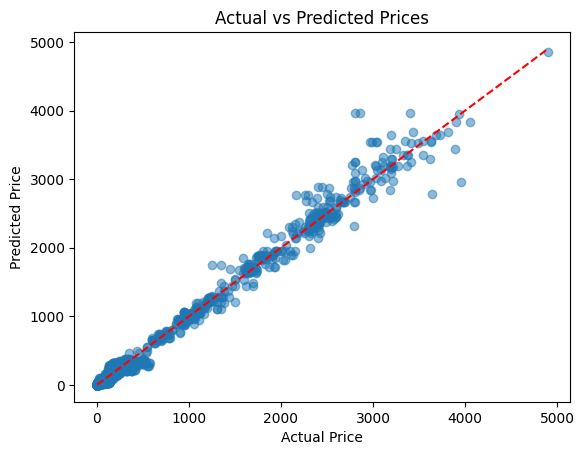

In [ ]:
import matplotlib.pyplot as plt
# Predict prices on test set
y_pred = dtr.predict(x_test)

# Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test['price'].min(), y_test['price'].max()],
         [y_test['price'].min(), y_test['price'].max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

**Comment:**The scatter plot shows how the predicted prices compare with the actual prices.

The red dashed line represents where perfect predictions would lie, and it helps you visually assess how accurate the model is by comparing how far the scatter points are from the line.

In [ ]:
y_pred =